# Generate a dataset of two classes each having 50 points as follows from Normal distribution, Mean at (-2,-2) Standard Deviation of 1 → Class A, Mean at (2,2) Standard Deviation of 2 → Class B
#### • Find the direction v using Fisher’s Linear Discriminant function and generate the plot as shown 
#### • Project all the 100 points on v
#### • Create your own criterion for classification.
#### • Classify the following points based on your criterion: (0,0), (0,-0.5),(0.5,0)

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

#### Generate Data

In [3]:
A_Class = np.random.normal(loc = (-2,-2), scale = 1, size = (50,2)) 
print(A_Class)
B_Class = np.random.normal(loc = (2,2), scale = 2, size = (50,2)) 
print(B_Class)

[[-3.74435932 -1.26704937]
 [-2.62808947 -3.96727667]
 [-1.0758898  -2.28002121]
 [-2.22375321 -2.01064728]
 [-1.42228727 -3.12461111]
 [-1.72051728 -3.82165231]
 [-2.60296887 -2.41931973]
 [ 0.1223614  -2.79978792]
 [-2.35275619  0.02895475]
 [-1.41141013 -2.21087067]
 [-3.45202443 -1.61185745]
 [-2.241511   -1.52640269]
 [-1.34034764 -2.37844544]
 [-1.74310473 -2.88884545]
 [-3.04758297 -2.35964364]
 [-2.0438689  -0.90762922]
 [-1.62909314 -0.13982865]
 [-3.50952938 -2.98721549]
 [-2.81370902 -3.8027161 ]
 [-1.19986096 -1.35155979]
 [-0.14583822 -2.63630937]
 [-1.80930921 -2.38881514]
 [-1.9989342  -2.27694698]
 [-2.19319866 -2.21391734]
 [-1.30527882 -2.67793293]
 [-3.23333536 -3.22196454]
 [-1.58807843 -2.00054026]
 [-3.47722452 -0.242122  ]
 [ 0.04493906 -2.16324078]
 [-0.94322792 -1.59390379]
 [-3.71043611 -1.53104604]
 [-4.48952716 -0.77684054]
 [-1.70545926  0.90249515]
 [-3.94084366 -0.88450896]
 [-2.14929119 -2.36252031]
 [-1.57354387 -1.83738146]
 [-3.55973931 -3.08821125]
 

#### Scatter plot of original data

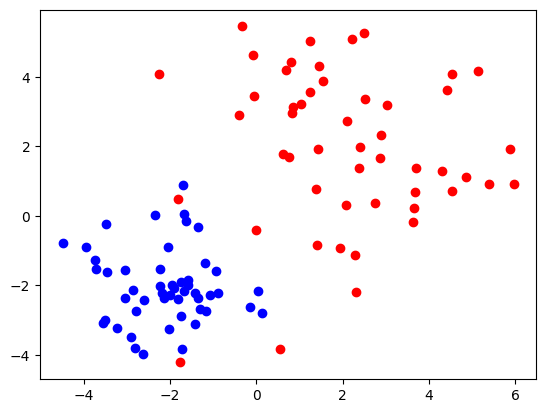

In [4]:
plt.scatter(A_Class[:, 0], A_Class[:, 1], color='blue', label='Class A')
plt.scatter(B_Class[:, 0], B_Class[:, 1], color='red', label='Class B')
plt.show()

#### We calculate the sample mean instead of given meam_A and mean_B

In [5]:
mean_A = np.mean(A_Class, axis=0)
mean_B = np.mean(B_Class, axis=0)
print(mean_A)
print(mean_B)

[-2.11599693 -2.02732553]
[2.06377819 1.94006039]


#### S_w = S_A + S_B, where S_A and S_B are scatter matrices of Class A and B respectively. 

In [6]:
# Center the data by subtracting the mean
centered_A = A_Class - mean_A  
centered_B = B_Class - mean_B  
# Compute scatter matrices using vectorized matrix multiplication
S_A = centered_A.T @ centered_A
S_B = centered_B.T @ centered_B
# Computing S_w
S_w = S_A + S_B
print(S_w)

[[236.94869374  -9.67715039]
 [ -9.67715039 300.17724513]]


#### Now, we will find the inverse of S_w

In [7]:
inverse_S_w =np.linalg.inv(S_w)
print(inverse_S_w)

[[0.00422589 0.00013623]
 [0.00013623 0.00333576]]


#### To compute the direction v, we will use the formula: v = (inverse of S_w)(mean_A - mean_B)
#### But both matrix is not following multiplication rule because (mean_A - mean_B) is 1 x 2 matrix, so we will take its transpose.

In [8]:
v = (inverse_S_w)@(mean_A - mean_B).T
print(v)

[-0.01820375 -0.01380367]


#### # Slope of projection direction

In [9]:
slope = v[1] / v[0]  
print(slope)

0.7582868491683349


#### Generate x values for decision boundary using min and max of dataset

In [10]:
x_min, x_max = min(A_Class[:, 0].min(), B_Class[:, 0].min()), max(A_Class[:, 0].max(), B_Class[:, 0].max()) # this finds min and max x-values from both classes
x_vals = np.linspace(x_min, x_max, 100) # Generates 100 evenly spaced x-values between x_min and x_max to plot the decision boundary (a straight line)
y_vals = slope * x_vals  # Line equation
print(x_min,x_max)
print(x_vals)
print(y_vals)

-4.489527157589775 5.96279242390097
[-4.48952716 -4.38394817 -4.27836919 -4.1727902  -4.06721121 -3.96163223
 -3.85605324 -3.75047426 -3.64489527 -3.53931629 -3.4337373  -3.32815832
 -3.22257933 -3.11700034 -3.01142136 -2.90584237 -2.80026339 -2.6946844
 -2.58910542 -2.48352643 -2.37794744 -2.27236846 -2.16678947 -2.06121049
 -1.9556315  -1.85005252 -1.74447353 -1.63889454 -1.53331556 -1.42773657
 -1.32215759 -1.2165786  -1.11099962 -1.00542063 -0.89984164 -0.79426266
 -0.68868367 -0.58310469 -0.4775257  -0.37194672 -0.26636773 -0.16078875
 -0.05520976  0.05036923  0.15594821  0.2615272   0.36710618  0.47268517
  0.57826415  0.68384314  0.78942213  0.89500111  1.0005801   1.10615908
  1.21173807  1.31731705  1.42289604  1.52847503  1.63405401  1.739633
  1.84521198  1.95079097  2.05636995  2.16194894  2.26752793  2.37310691
  2.4786859   2.58426488  2.68984387  2.79542285  2.90100184  3.00658083
  3.11215981  3.2177388   3.32331778  3.42889677  3.53447575  3.64005474
  3.74563372  3.85

#### Plotting the slope of projection

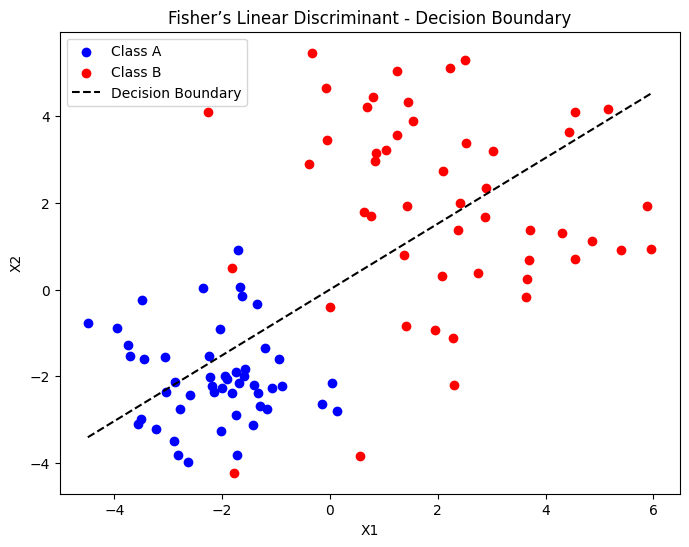

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(A_Class[:, 0], A_Class[:, 1], color='blue', label='Class A')
plt.scatter(B_Class[:, 0], B_Class[:, 1], color='red', label='Class B')
plt.plot(x_vals, y_vals, color='black', linestyle='--', label="Decision Boundary")
plt.legend()
# X1 and X2 are the two features (dimensions) of the dataset.
plt.xlabel("X1")
plt.ylabel("X2") 
plt.title("Fisher’s Linear Discriminant - Decision Boundary")
plt.show()

#### Project all points onto v

In [12]:
Projected_A = A_Class @ v
print(Projected_A)
Projected_B = B_Class @ v
print(Projected_B)

[0.08565131 0.10260405 0.05105788 0.06823496 0.06902205 0.08407268
 0.08077928 0.0364199  0.04242931 0.05621108 0.08508934 0.06187386
 0.05723062 0.0716077  0.08804918 0.04973469 0.03158576 0.10512113
 0.10371148 0.04049845 0.03904554 0.06591062 0.06781832 0.07048462
 0.06072626 0.10333376 0.05652378 0.0666407  0.02904259 0.039172
 0.08867791 0.09244949 0.01858802 0.08394761 0.0717366  0.054007
 0.10742925 0.04680955 0.05902159 0.06327672 0.02893143 0.08153775
 0.02976717 0.08854976 0.100832   0.05787871 0.06294859 0.06042193
 0.08173776 0.07694862]
[-0.022667   -0.11087231  0.00567957 -0.01424442 -0.15116411 -0.07139499
 -0.06348054 -0.11832478 -0.06988006 -0.09244176  0.04266992 -0.08484603
 -0.07572634 -0.03289668 -0.09911153 -0.07580748 -0.07035894 -0.06365138
 -0.13372715 -0.05887619 -0.06233135 -0.06265035  0.09049868 -0.07650736
 -0.09238318 -0.03594756 -0.0691451  -0.02613263 -0.0718235  -0.0116165
 -0.09205655 -0.12135137 -0.01543351 -0.09622475 -0.13061204 -0.05507116
 -0.110

#### Define Classification criterion (using min/max boundary)

In [13]:
criterion = (max(Projected_A) + min(Projected_B)) / 2
print(criterion)

-0.02186742956732586


#### Classify new points

In [14]:
test_points = np.array([[0, 0], [0, -0.5], [0.5, 0]])
projected_test = test_points @ v
print(projected_test)
for i, point in enumerate(test_points):
    classification = "Class A" if projected_test[i] > criterion else "Class B"
    print(f"Point {point} is classified as {classification}")

[ 0.          0.00690183 -0.00910188]
Point [0. 0.] is classified as Class A
Point [ 0.  -0.5] is classified as Class A
Point [0.5 0. ] is classified as Class A


#### Convert 1D projections back to 2D space along v

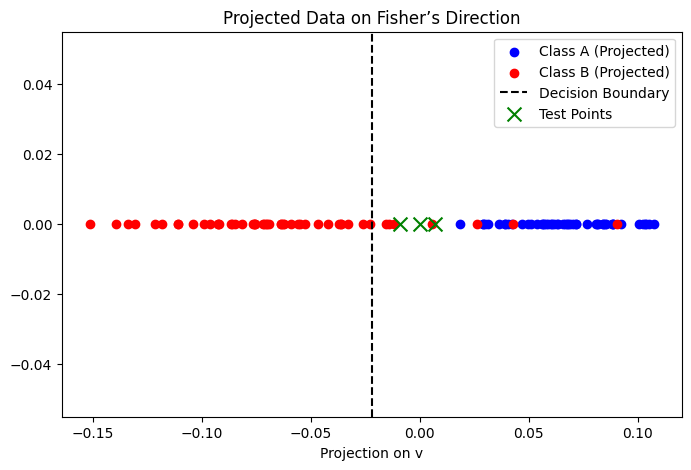

In [15]:
# Plot projected data 
plt.figure(figsize=(8, 5))

# Class A projections
plt.scatter(Projected_A, [0] * len(Projected_A), color='blue', label='Class A (Projected)')

# Class B projections
plt.scatter(Projected_B, [0] * len(Projected_B), color='red', label='Class B (Projected)')

# Decision boundary
plt.axvline(criterion, color='black', linestyle='--', label='Decision Boundary')

# Test points
plt.scatter(projected_test, [0] * len(projected_test), color='green', marker='x', s=100, label='Test Points')

plt.xlabel("Projection on v")
plt.title("Projected Data on Fisher’s Direction")
plt.legend()
plt.show()


#

#

# Use the iris dataset Petal Length and Petal Width for Versicolor and Virginica species.
#### • Randomly select 40 points each from the two classes.
#### • Find the direction v using Fisher’s Linear Discriminant function and generate the plot with the data points and the direction v.
#### • Project all the points on v.
#### • Create your own criterion for classification.
#### • Classify the remaining 10 points for each class and report the accuracy.

#### Load Iris dataset

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Using Petal Length and Petal Width
Y = iris.target
print(X)
print(Y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

#### Extract Versicolor (Class 1) and Virginica (Class 2)

In [44]:
# Selecting only Versicolor (1) and Virginica (2) species
mask = (Y == 1) | (Y == 2)
X = X[mask]
Y = Y[mask]
print(X)
print(Y)

[[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]
 [4.6 1.4]
 [4.  1.2]
 [3.3 1. ]
 [4.2 1.3]
 [4.2 1.2]
 [4.2 1.3]
 [4.3 1.3]
 [3.  1.1]
 [4.1 1.3]
 [6.  2.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.6 1.8]
 [5.8 2.2]
 [6.6 2.1]
 [4.5 1.7]
 [6.3 1.8]
 [5.8 1.8]
 [6.1 2.5]
 [5.1 2. ]
 [5.3 1.9]
 [5.5 2.1]
 [5.  2. ]
 [5.1 2.4]
 [5.3 2.3]
 [5.5 1.8]
 [6.7 2.2]
 [6.9 2.3]
 [5.  1.5]
 [5.7 2.3]
 [4.9 2. ]
 [6.7 2. ]
 [4.9 1.8]
 [5.7 2.1]
 [6.  1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.6 2.1]
 [5.8 1.6]
 [6.1 1.9]
 [6.4 2. ]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]
 [6.1 2.3]
 [5.6 2.4]
 [5.5 1.8]
 [4.8 1.8]
 [5.4 2.1]
 [5.6 2.4]

#### Convert labels to 0 and 1 (Versicolor -> 0, Virginica -> 1)

In [45]:
Y = Y - 1
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Split into training (40 points) and testing (10 points) for each class.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

#### Separate the two classes in training data

In [50]:
X_class0 = X_train[Y_train == 0]
X_class1 = X_train[Y_train == 1]
print(X_class0)
print(X_class1)

[[4.4 1.4]
 [4.7 1.6]
 [3.7 1. ]
 [4.2 1.3]
 [4.5 1.5]
 [4.5 1.6]
 [4.6 1.4]
 [4.9 1.5]
 [4.  1. ]
 [3.  1.1]
 [3.9 1.4]
 [3.5 1. ]
 [3.9 1.1]
 [4.  1.3]
 [4.3 1.3]
 [5.1 1.6]
 [4.5 1.3]
 [4.2 1.2]
 [4.2 1.5]
 [4.4 1.3]
 [4.  1.3]
 [3.9 1.2]
 [4.7 1.2]
 [4.7 1.4]
 [3.8 1.1]
 [4.6 1.3]
 [4.7 1.4]
 [4.2 1.3]
 [4.5 1.5]
 [4.4 1.2]
 [3.3 1. ]
 [4.3 1.3]
 [4.5 1.5]
 [4.6 1.5]
 [4.8 1.4]
 [5.  1.7]
 [4.1 1. ]
 [4.7 1.5]
 [4.  1.3]
 [4.4 1.4]]
[[5.9 2.1]
 [5.1 2. ]
 [5.5 1.8]
 [6.9 2.3]
 [6.1 2.5]
 [5.1 1.8]
 [5.6 2.4]
 [5.6 2.1]
 [5.4 2.1]
 [6.1 1.9]
 [5.7 2.1]
 [5.3 1.9]
 [5.7 2.3]
 [4.9 2. ]
 [6.7 2.2]
 [5.5 1.8]
 [5.8 2.2]
 [4.8 1.8]
 [5.6 2.4]
 [5.3 2.3]
 [5.1 2.3]
 [4.8 1.8]
 [6.  2.5]
 [5.2 2.3]
 [6.4 2. ]
 [5.1 1.5]
 [6.6 2.1]
 [5.6 2.2]
 [6.7 2. ]
 [5.1 2.4]
 [5.5 2.1]
 [5.1 1.9]
 [5.  1.9]
 [5.6 1.8]
 [4.9 1.8]
 [5.7 2.5]
 [5.2 2. ]
 [5.4 2.3]
 [5.8 1.6]
 [6.1 2.3]]


#### Plot the training data

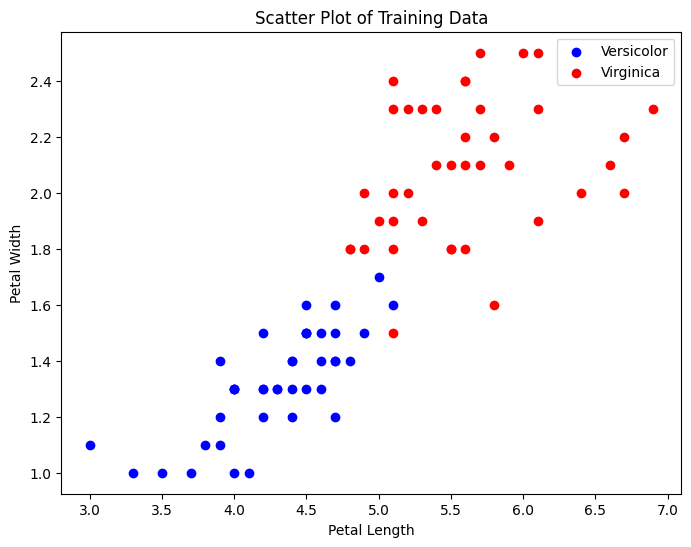

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Versicolor')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Scatter Plot of Training Data")
plt.show()

#### Compute the mean of each class

In [54]:
mean_0 = np.mean(X_class0, axis=0)
mean_1 = np.mean(X_class1, axis=0)
print(mean_0)
print(mean_1)

[4.2925 1.3225]
[5.5875 2.0825]


#### Compute the within-class scatter matrix

In [55]:
S_0 = (X_class0 - mean_0).T @ (X_class0 - mean_0)
S_1 = (X_class1 - mean_1).T @ (X_class1 - mean_1)
S_w = S_0 + S_1
print(S_w)

[[19.4915  4.238 ]
 [ 4.238   3.8675]]


#### Compute the direction v using Fisher’s LDA

In [56]:
v = np.linalg.inv(S_w) @ (mean_1 - mean_0)
print(v)

[0.03112935 0.16239788]


####  Normalize v for visualization purposes

In [57]:
v = v / np.linalg.norm(v)
print(v)

[0.18825828 0.98211955]


#### Plot data points along with the Fisher direction

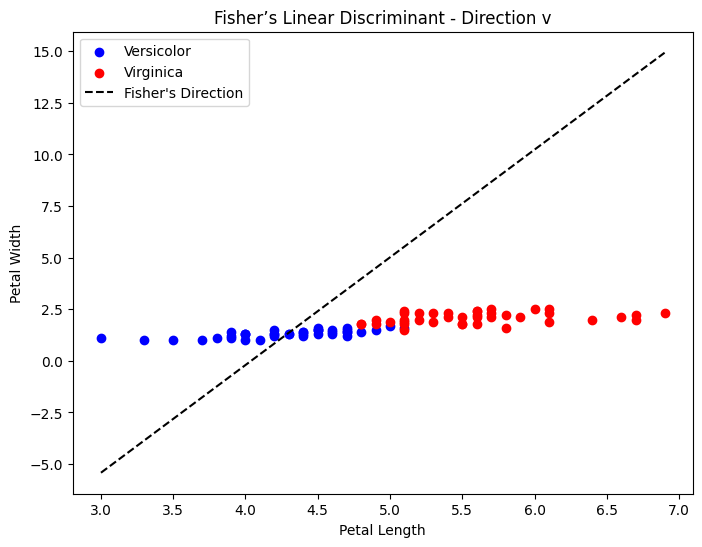

In [58]:
slope = v[1] / v[0]  # Calculate slope for visualization
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = slope * (x_vals - mean_0[0]) + mean_0[1]

plt.figure(figsize=(8, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Versicolor')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Virginica')
plt.plot(x_vals, y_vals, color='black', linestyle='--', label="Fisher's Direction")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Fisher’s Linear Discriminant - Direction v")
plt.show()

#### Project all points onto v

In [60]:
projected_0 = X_class0 @ v
projected_1 = X_class1 @ v

#### Define the classification criterion as the midpoint of class projections

In [61]:
criterion = (projected_0.max() + projected_1.min()) / 2
print(criterion)

2.5220956198779545


#### Project test points onto v and classify

In [63]:
projected_test = X_test @ v
predictions = (projected_test > criterion).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions == Y_test) * 100
print(f"Classification Accuracy: {accuracy:.2f}%")

Classification Accuracy: 80.00%


#### Plot projections

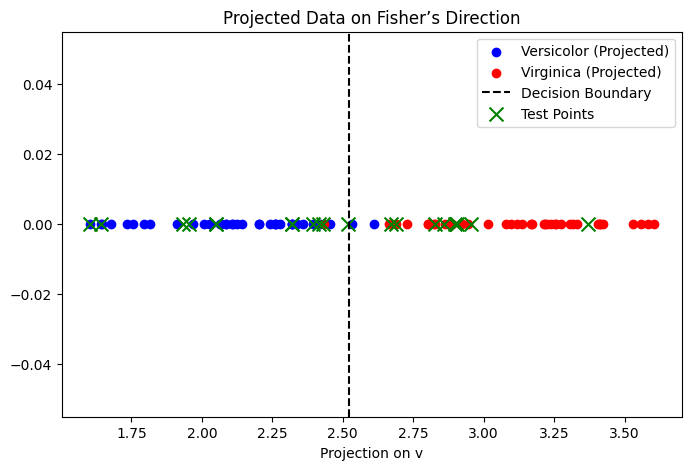

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(projected_0, [0] * len(projected_0), color='blue', label='Versicolor (Projected)')
plt.scatter(projected_1, [0] * len(projected_1), color='red', label='Virginica (Projected)')
plt.axvline(criterion, color='black', linestyle='--', label='Decision Boundary')
plt.scatter(projected_test, [0] * len(projected_test), color='green', marker='x', s=100, label='Test Points')
plt.xlabel("Projection on v")
plt.title("Projected Data on Fisher’s Direction")
plt.legend()
plt.show()